In [1]:
# Importing Basic libreries

import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Importing the data set

In [3]:
od.download('https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data')

Skipping, found downloaded files in ".\breast-cancer-wisconsin-data" (use force=True to force download)


In [3]:
os.listdir('breast-cancer-wisconsin-data')

['data.csv']

In [4]:
data_df = pd.read_csv('breast-cancer-wisconsin-data/data.csv')

In [5]:
# removing unecessary columns
data_df = data_df.drop(columns=['Unnamed: 32','id'])

In [6]:
data_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Spliting the data into training  (80%) and test set (20%)

train_df, test_df = train_test_split(data_df, test_size = 0.2)

In [9]:
# Defining input and target column
target_col = "diagnosis"
input_cols = list(data_df.columns)[1:]

In [10]:
print(input_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [11]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [12]:
# importing DecisionTreeClassifier for prediction
from sklearn.tree import DecisionTreeClassifier

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
model = DecisionTreeClassifier(random_state=42)

In [15]:
%%time
model.fit(train_inputs, train_targets)

CPU times: total: 15.6 ms
Wall time: 19 ms


DecisionTreeClassifier(random_state=42)

In [16]:
model.score(train_inputs,train_targets)

1.0

In [17]:
model.score(test_inputs,test_targets)

0.8859649122807017

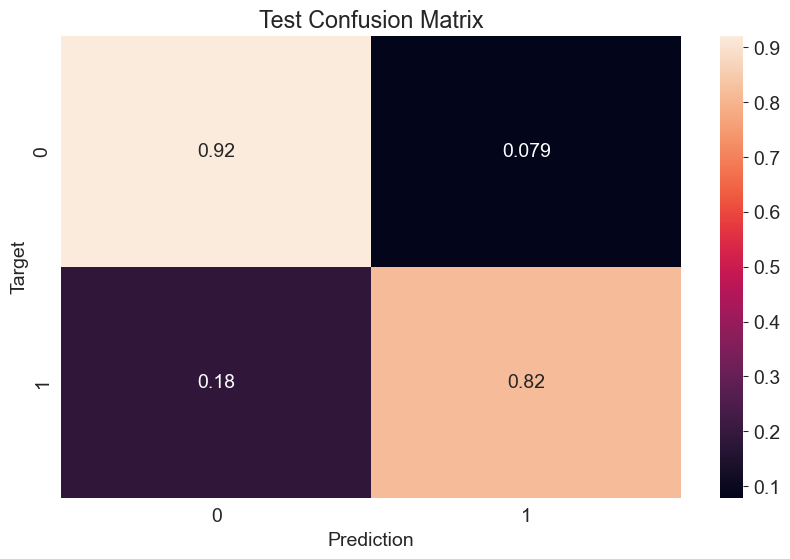

In [18]:
preds = model.predict(test_inputs)
cf = confusion_matrix(test_targets, preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix');

## visualuzation

In [19]:
from sklearn.tree import plot_tree, export_text

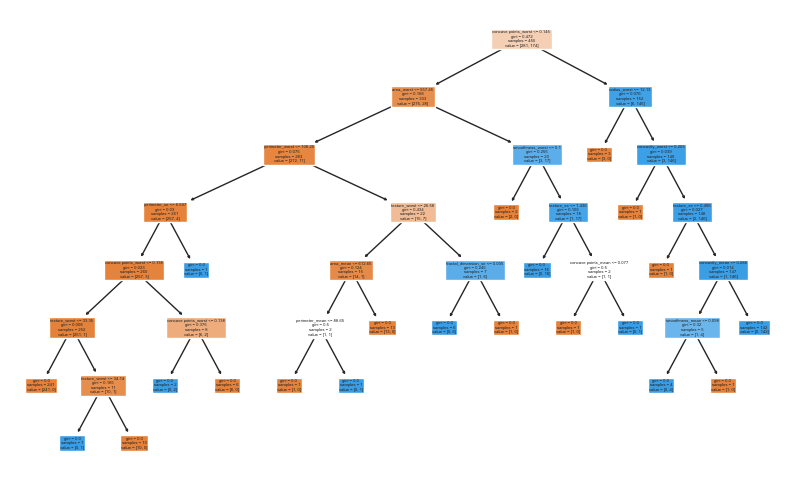

In [20]:

plot_tree(model, feature_names=train_inputs.columns.tolist(), filled=True);

In [21]:
model.tree_.max_depth

7

we want to try different variations in max_depth

In [22]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_inputs, train_targets)
    train_acc = 1 - model.score(train_inputs, train_targets)
    val_acc = 1- model.score(test_inputs,test_targets)
    return {'Max Depth': md, 'Training Error':train_acc, 'Validation Error': val_acc}

In [23]:
%%time
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

CPU times: total: 188 ms
Wall time: 397 ms


In [24]:
error_df

,Max Depth,Training Error,Validation Error
0,1,0.074725,0.114035
1,2,0.037363,0.061404
2,3,0.030769,0.078947
3,4,0.015385,0.087719
4,5,0.010989,0.105263
5,6,0.002198,0.078947
6,7,0.000000,0.114035
7,8,0.000000,0.114035
8,9,0.000000,0.114035
9,10,0.000000,0.114035


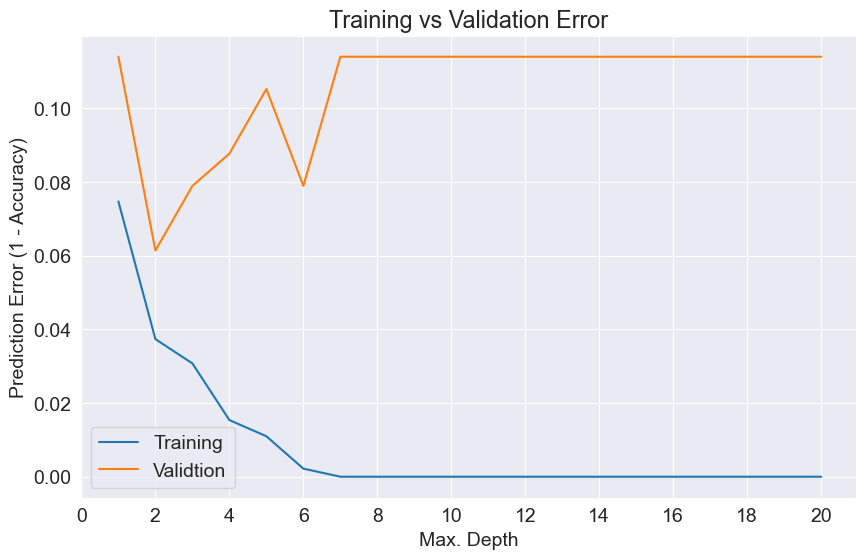

In [25]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validtion']);

The validation error is at its lowest for max_depth > 7

In [26]:
# Now we are playing with max-leaf_nodes
model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [27]:
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [28]:
model.score(train_inputs, train_targets)

0.9846153846153847

In [29]:
model.score(test_inputs, test_targets)

0.9035087719298246

In [30]:
model.tree_.max_depth

4

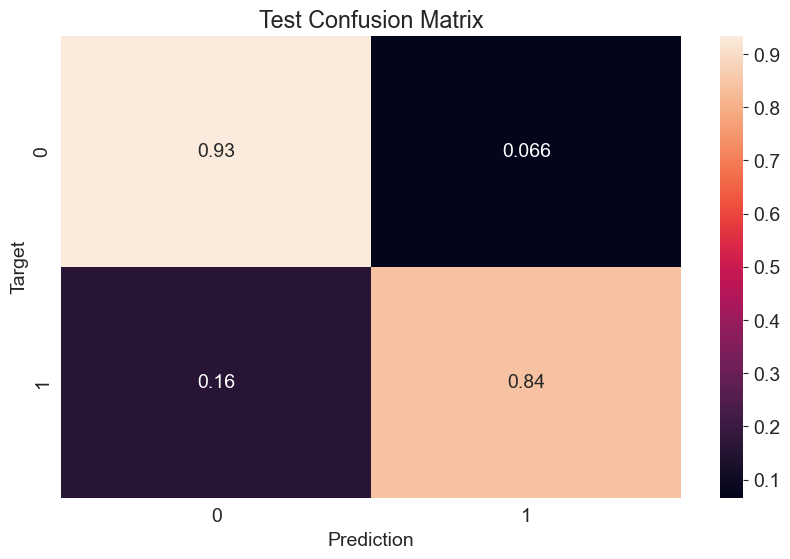

In [31]:
preds =model.predict(test_inputs)
cf = confusion_matrix(test_targets, preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix');

### Since we know that max_depth and max_leaf_nodes can effect the accuracy lets try different combinations of them.

In [32]:
def max_depth_error(md,ml):
    model = DecisionTreeClassifier(max_depth=md,max_leaf_nodes=ml, random_state=42)
    model.fit(train_inputs, train_targets)
    train_acc = 1 - model.score(train_inputs, train_targets)
    val_acc = 1- model.score(test_inputs,test_targets)
    return {'Max Depth': md, 'max Leaf':ml, 'Training Error':train_acc, 'Validation Error': val_acc}

In [33]:
from itertools import product

In [34]:
%%time
error_df = pd.DataFrame([max_depth_error(md,ml) for md,ml in product(range(1,20),range(3,20))])

CPU times: total: 2.45 s
Wall time: 4.58 s


In [35]:
error_df

,Max Depth,max Leaf,Training Error,Validation Error
0,1,3,0.074725,0.114035
1,1,4,0.074725,0.114035
2,1,5,0.074725,0.114035
3,1,6,0.074725,0.114035
4,1,7,0.074725,0.114035
...,...,...,...,...
318,19,15,0.006593,0.087719
319,19,16,0.006593,0.087719
320,19,17,0.004396,0.087719
321,19,18,0.004396,0.087719


In [36]:
error_df.describe().loc[['min','max']]

,Max Depth,max Leaf,Training Error,Validation Error
min,1.0,3.0,0.002198,0.061404
max,19.0,19.0,0.074725,0.114035


In [37]:
error_df[error_df['Validation Error']==error_df['Validation Error'].min()]

,Max Depth,max Leaf,Training Error,Validation Error
17,2,3,0.043956,0.061404
18,2,4,0.037363,0.061404
19,2,5,0.037363,0.061404
20,2,6,0.037363,0.061404
21,2,7,0.037363,0.061404
22,2,8,0.037363,0.061404
23,2,9,0.037363,0.061404
24,2,10,0.037363,0.061404
25,2,11,0.037363,0.061404
26,2,12,0.037363,0.061404


There are many combinations with minimum value. I have decided to choose max_depth = 3 and max_leaf_nodes = 6.

In [38]:
model = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=6, random_state=42)
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6, random_state=42)

In [39]:
model.score(test_inputs,test_targets)

0.9298245614035088

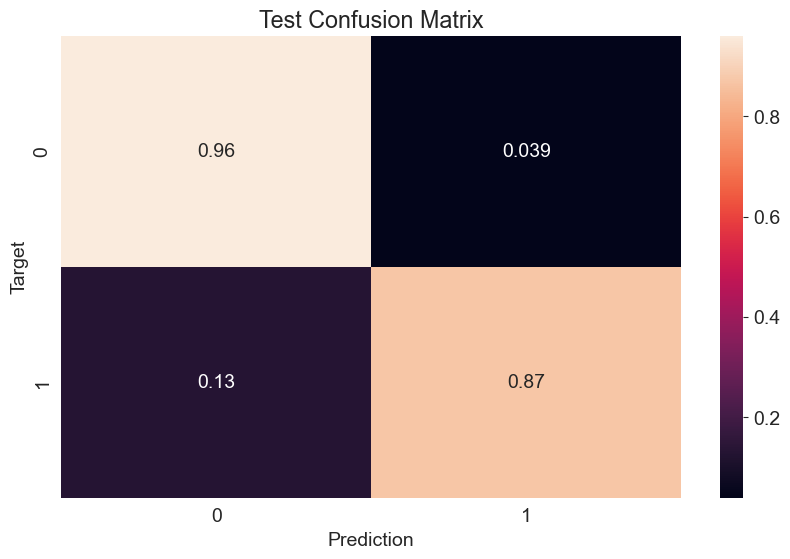

In [40]:
preds =model.predict(test_inputs)
cf = confusion_matrix(test_targets, preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix');

In [41]:
model.score(train_inputs, train_targets)

0.967032967032967

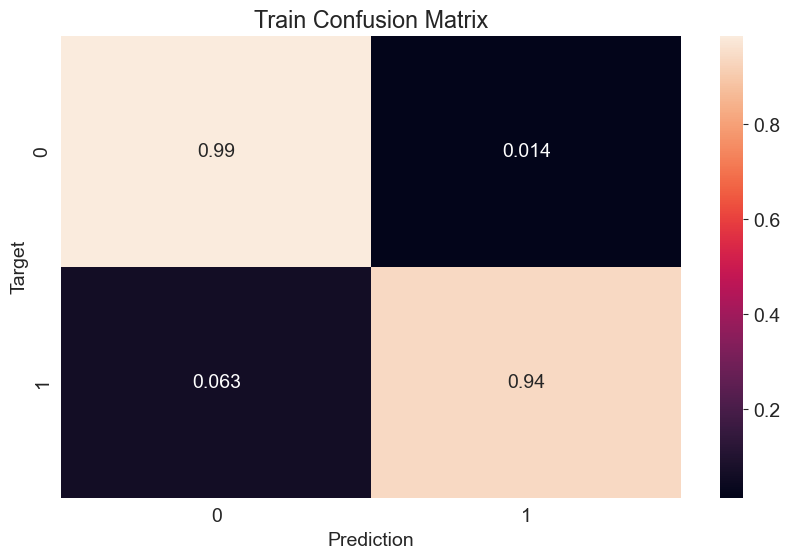

In [42]:
preds =model.predict(train_inputs)
cf = confusion_matrix(train_targets, preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Train Confusion Matrix');

In [43]:
model.score(data_df[input_cols], data_df[target_col])

0.9595782073813708

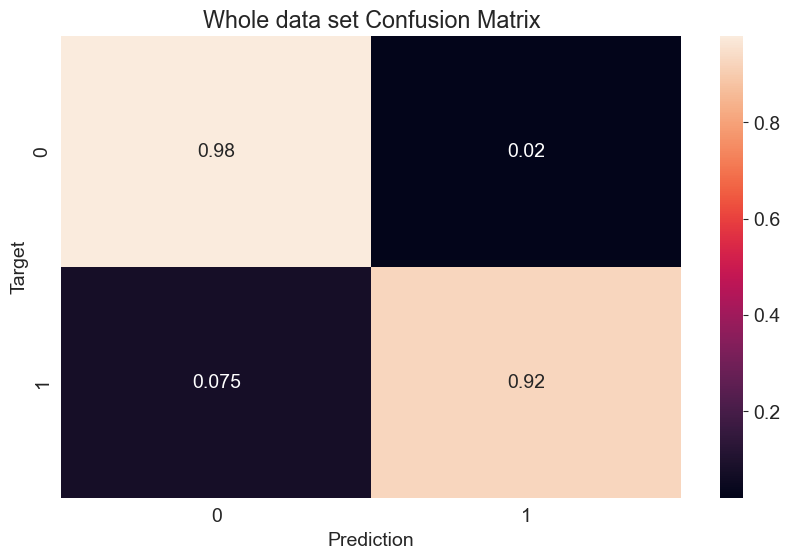

In [44]:
preds =model.predict(data_df[input_cols])
cf = confusion_matrix(data_df[target_col], preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Whole data set Confusion Matrix');

## Now we are trying randomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [47]:
%%time 
model.fit(train_inputs,train_targets)

CPU times: total: 93.8 ms
Wall time: 151 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [48]:
model.score(train_inputs,train_targets)

1.0

In [49]:
model.score(test_inputs,test_targets)

0.9473684210526315

The accuracy has not improved, insted it has gone down

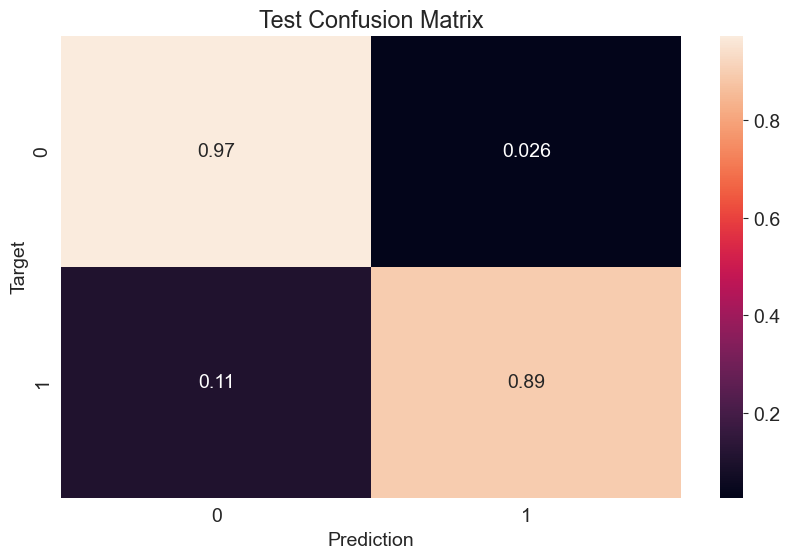

In [50]:
preds =model.predict(test_inputs)
cf = confusion_matrix(test_targets, preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix');

In [51]:
model.score(data_df[input_cols],data_df[target_col])

0.9894551845342706

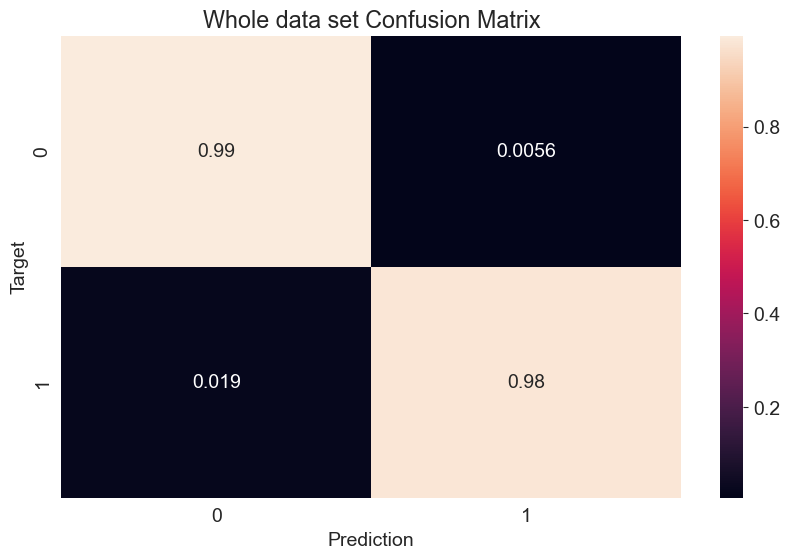

In [52]:
preds =model.predict(data_df[input_cols])
cf = confusion_matrix(data_df[target_col], preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Whole data set Confusion Matrix');

Here i am just checking if the prediction is correct by manually entering the data

In [53]:
model.predict([[17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)

In [54]:
model.predict(data_df[input_cols].head(1))

array(['M'], dtype=object)

In [55]:
data_df[input_cols].loc[0]

radius_mean                  17.990000
texture_mean                 10.380000
perimeter_mean              122.800000
area_mean                  1001.000000
smoothness_mean               0.118400
compactness_mean              0.277600
concavity_mean                0.300100
concave points_mean           0.147100
symmetry_mean                 0.241900
fractal_dimension_mean        0.078710
radius_se                     1.095000
texture_se                    0.905300
perimeter_se                  8.589000
area_se                     153.400000
smoothness_se                 0.006399
compactness_se                0.049040
concavity_se                  0.053730
concave points_se             0.015870
symmetry_se                   0.030030
fractal_dimension_se          0.006193
radius_worst                 25.380000
texture_worst                17.330000
perimeter_worst             184.600000
area_worst                 2019.000000
smoothness_worst              0.162200
compactness_worst        

In [56]:
train_probs = model.predict_proba(train_inputs)
train_probs

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.19, 0.81],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.97, 0.03],
       [0.17, 0.83],
       [0.  , 1.  ],
       [0.44, 0.56],
       [1.  , 0.  ],
       [0.08, 0.92],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.19, 0.81],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.11, 0.89],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.13, 0.87],
       [1.  ,

In [57]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

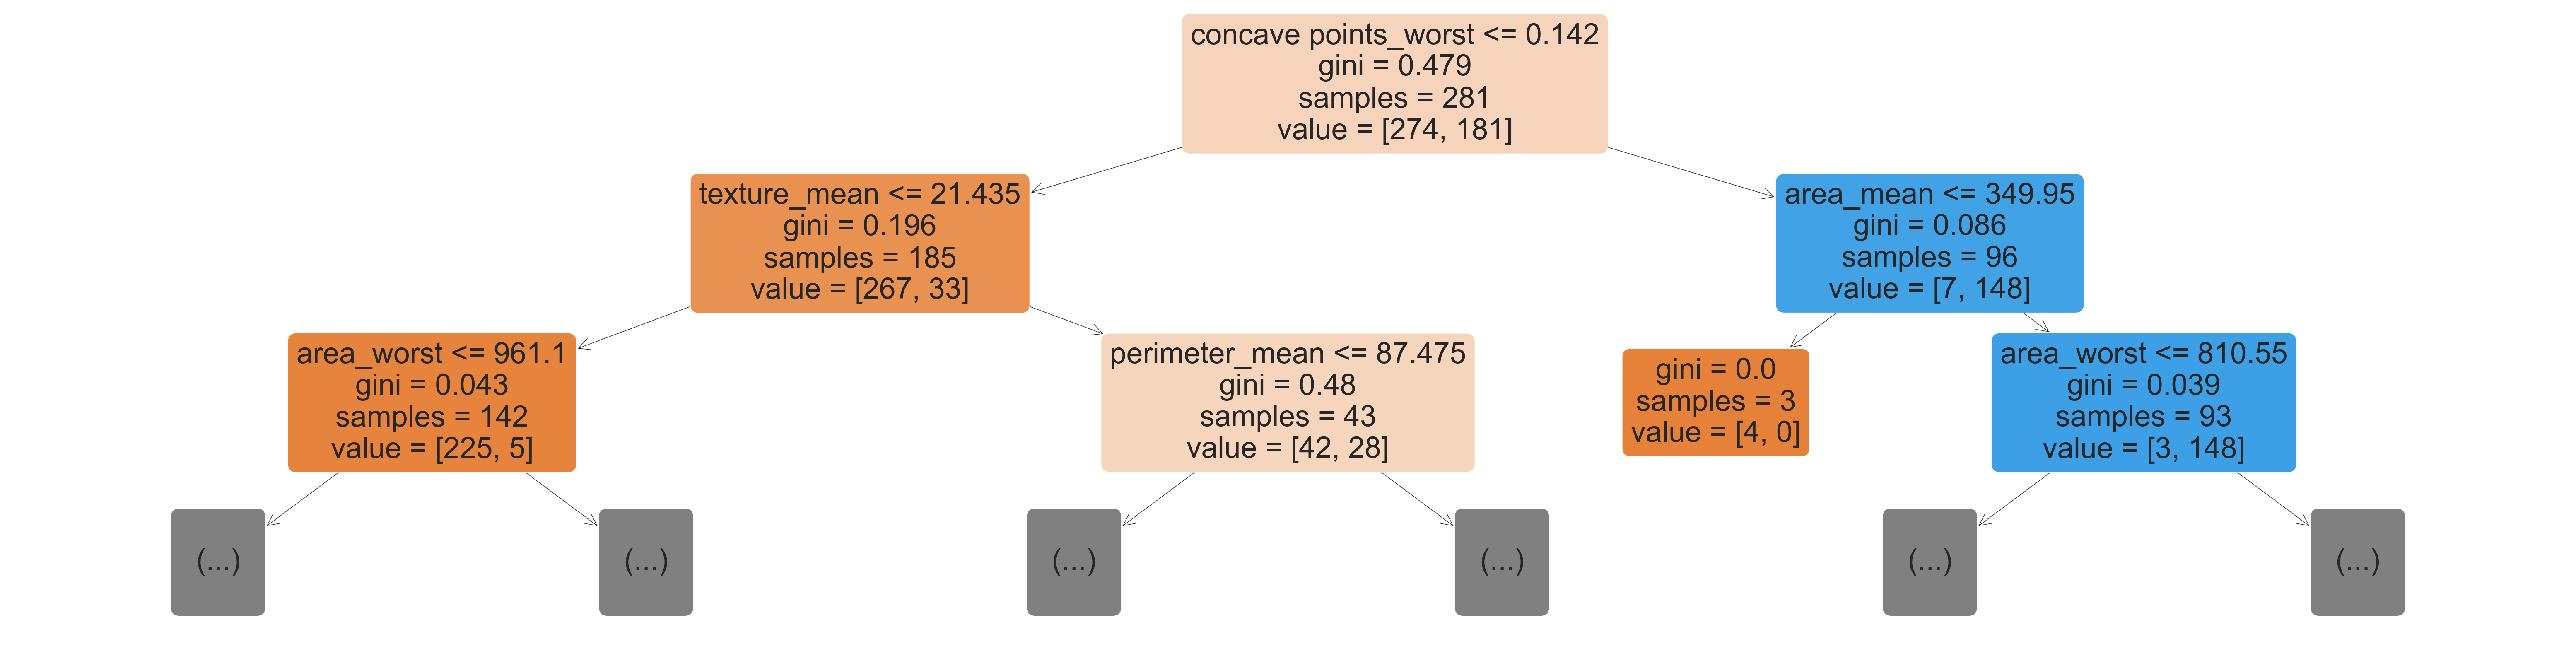

In [58]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=input_cols,filled=True,rounded=True);

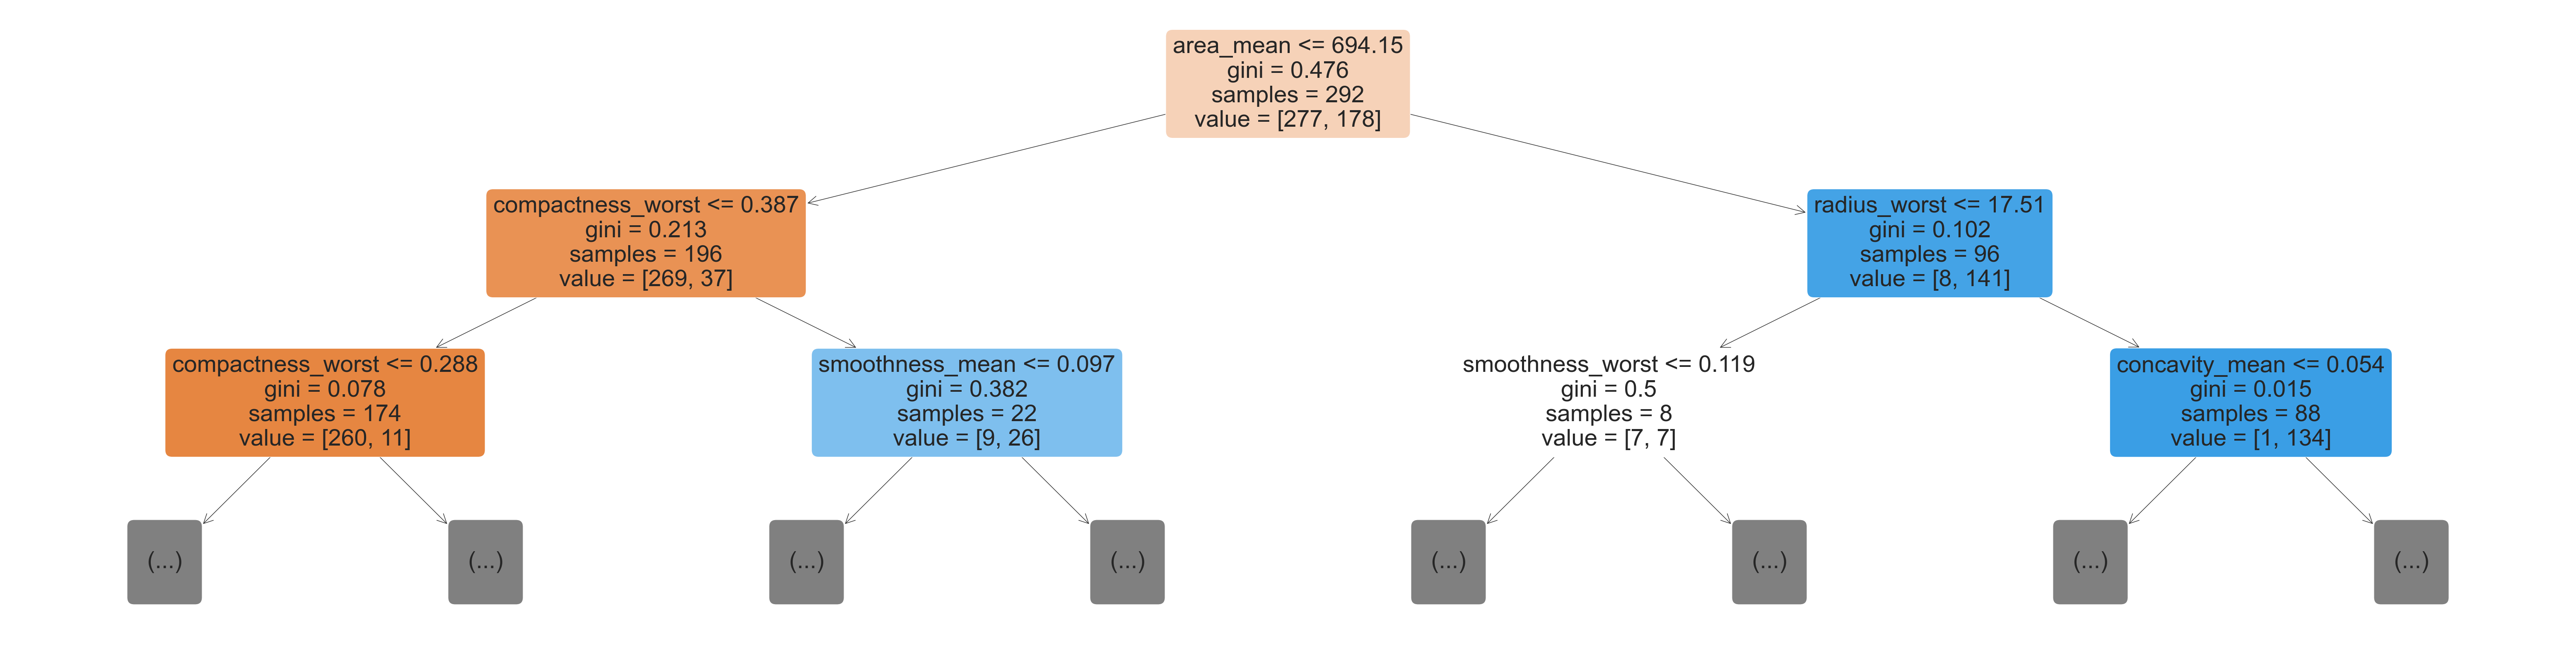

In [59]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=input_cols,filled=True,rounded=True);

In [60]:
len(model.estimators_)

100

The outcome is solution of 100 decision trees with slite randomness

In [61]:
importance_df = pd.DataFrame({
    'feature':input_cols,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [62]:
importance_df

,feature,importance
27,concave points_worst,0.158659
23,area_worst,0.132372
6,concavity_mean,0.084980
22,perimeter_worst,0.083509
20,radius_worst,0.081922
7,concave points_mean,0.081144
2,perimeter_mean,0.071165
3,area_mean,0.051044
0,radius_mean,0.040812
26,concavity_worst,0.038604


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

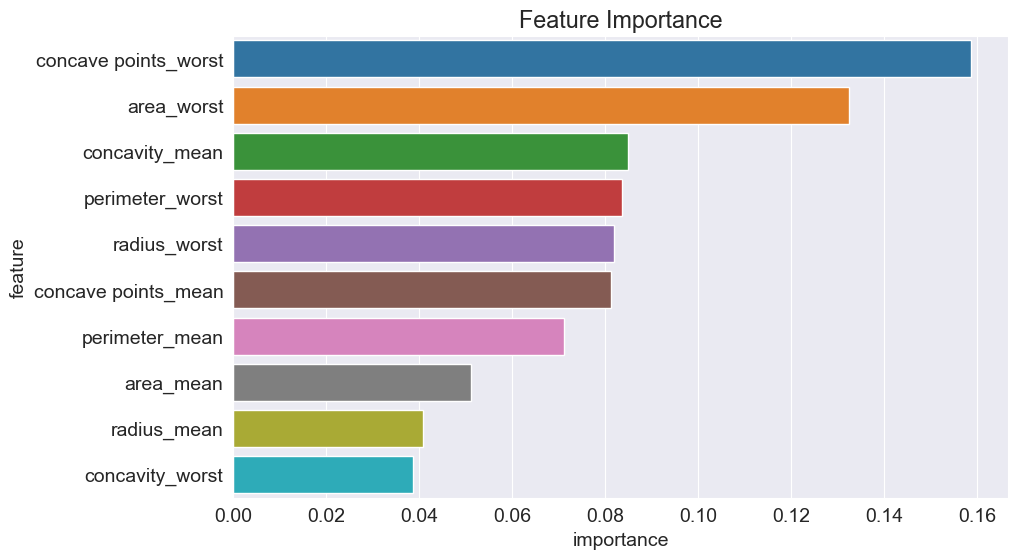

In [63]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance', y='feature')

#### These are the top 10 most importent features

## Hyperparameter Tuning with Random Forests

In [64]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(train_inputs,train_targets)

In [65]:
base_train_acc = base_model.score(train_inputs, train_targets)
base_val_acc = base_model.score(test_inputs,test_targets)

In [66]:
base_accs = base_train_acc, base_val_acc
base_accs

(1.0, 0.9473684210526315)

## n_estimators

In [67]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)

In [68]:
model.fit(train_inputs,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [69]:
model.score(train_inputs,train_targets), model.score(test_inputs,test_targets)

(1.0, 0.9473684210526315)

Now we are going to predict for different values of n_estimators

In [70]:
def function(x):
    model = RandomForestClassifier(random_state=40, n_jobs=-1, n_estimators=x)
    model.fit(train_inputs,train_targets)
    train_error=1-model.score(train_inputs,train_targets)
    test_error=1-model.score(test_inputs,test_targets)
    return {'n_estimators':x,'train_error':train_error,'test_error':test_error}

In [71]:
%%time
error_df=pd.DataFrame([function(x) for x in range(1,101)])

CPU times: total: 3.42 s
Wall time: 12 s


In [72]:
error_df

,n_estimators,train_error,test_error
0,1,0.021978,0.114035
1,2,0.024176,0.078947
2,3,0.013187,0.078947
3,4,0.015385,0.061404
4,5,0.002198,0.070175
5,6,0.002198,0.070175
6,7,0.002198,0.070175
7,8,0.002198,0.061404
8,9,0.002198,0.061404
9,10,0.002198,0.061404


In [73]:
error_df.describe().loc[['min','max']]

,n_estimators,train_error,test_error
min,1.0,0.000000,0.052632
max,100.0,0.024176,0.114035


In [74]:
error_df[error_df['test_error']==error_df['test_error'].min()]

,n_estimators,train_error,test_error
10,11,0.002198,0.052632
11,12,0.002198,0.052632
12,13,0.000000,0.052632
14,15,0.000000,0.052632
16,17,0.000000,0.052632
18,19,0.002198,0.052632
28,29,0.000000,0.052632
30,31,0.000000,0.052632
31,32,0.000000,0.052632
32,33,0.000000,0.052632


In [75]:
# I decided to choose n_estimations =9 basesd on the previous test

model = RandomForestClassifier(random_state=40, n_jobs=-1, n_estimators=9)
model.fit(train_inputs,train_targets)
train_error=model.score(train_inputs,train_targets)
test_error=model.score(test_inputs,test_targets)

In [76]:
train_error

0.9978021978021978

In [77]:
test_error

0.9385964912280702

### Still there is no improvement in the accuracy

## Lets play with `max-depth` and `n_estimators` for RandomForestClassifier

In [78]:
def test_params(x,y):
    model = RandomForestClassifier(random_state=40, n_jobs=-1, max_depth=x,n_estimators=y).fit(train_inputs,train_targets)
    train_error=1-model.score(train_inputs,train_targets)
    test_error=1-model.score(test_inputs,test_targets)
    return {'max_depth':x,'n_estimators':y,'train_error':train_error,'test_error':test_error}

In [79]:
%%time
# We are trying different combinations of max_depth and Max_leaf_nodes


error_df=pd.DataFrame([test_params(x,y) for x,y in product(range(1,11),range(1,101))])

CPU times: total: 39.9 s
Wall time: 1min 43s


In [80]:
error_df

,max_depth,n_estimators,train_error,test_error
0,1,1,0.087912,0.052632
1,1,2,0.052747,0.061404
2,1,3,0.050549,0.061404
3,1,4,0.050549,0.061404
4,1,5,0.059341,0.061404
...,...,...,...,...
995,10,96,0.000000,0.052632
996,10,97,0.000000,0.052632
997,10,98,0.000000,0.052632
998,10,99,0.000000,0.052632


In [81]:
error_df.describe().loc[['min','max']]

,max_depth,n_estimators,train_error,test_error
min,1.0,1.0,0.000000,0.043860
max,10.0,100.0,0.087912,0.114035


In [82]:
error_df[error_df['test_error']==error_df['test_error'].min()]

,max_depth,n_estimators,train_error,test_error
127,2,28,0.028571,0.04386
203,3,4,0.030769,0.04386
204,3,5,0.026374,0.04386
206,3,7,0.024176,0.04386
225,3,26,0.015385,0.04386
226,3,27,0.017582,0.04386
227,3,28,0.015385,0.04386
228,3,29,0.015385,0.04386
229,3,30,0.015385,0.04386
230,3,31,0.015385,0.04386


In [83]:
model = RandomForestClassifier(random_state=40, n_jobs=-1, max_depth=3,n_estimators=6).fit(train_inputs,train_targets)
model.score(test_inputs,test_targets)

0.9473684210526315

#### There is a considerable improvement in the accuracy from 92.98% to 94.73%

Now we are going to different combinations of 3 parametars (n_estimators, max_depth, max_leaf-nodes0

In [84]:
def test_params(x,y,z):
    model = RandomForestClassifier(random_state=40, n_jobs=-1,max_leaf_nodes=y, max_depth=x,n_estimators=z).fit(train_inputs,train_targets)
    train_error=1-model.score(train_inputs,train_targets)
    test_error=1-model.score(test_inputs,test_targets)
    return {'max_depth':x,'max_leaf_nodes':y,'n_estimators':z,'train_error':train_error,'test_error':test_error}

In [85]:
%%time
error_df=pd.DataFrame([test_params(x,y,z) for x,y,z in product(range(2,9),range(3,30),range(20,70))])

KeyboardInterrupt: 

In [86]:
error_df

,max_depth,n_estimators,train_error,test_error
0,1,1,0.087912,0.052632
1,1,2,0.052747,0.061404
2,1,3,0.050549,0.061404
3,1,4,0.050549,0.061404
4,1,5,0.059341,0.061404
...,...,...,...,...
995,10,96,0.000000,0.052632
996,10,97,0.000000,0.052632
997,10,98,0.000000,0.052632
998,10,99,0.000000,0.052632


So tried 9450 combinations.

In [87]:
error_df[error_df['test_error']==error_df['test_error'].min()]

,max_depth,n_estimators,train_error,test_error
127,2,28,0.028571,0.04386
203,3,4,0.030769,0.04386
204,3,5,0.026374,0.04386
206,3,7,0.024176,0.04386
225,3,26,0.015385,0.04386
226,3,27,0.017582,0.04386
227,3,28,0.015385,0.04386
228,3,29,0.015385,0.04386
229,3,30,0.015385,0.04386
230,3,31,0.015385,0.04386


On seeing the test_error we find that there was no improvement in the accuracy. We are still stuck with 94%

In [88]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier(random_state=40, n_jobs=-1, max_depth=3,n_estimators=6) 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(train_inputs, train_targets)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', train_inputs.columns[rfecv.support_])

Optimal number of features : 12
Best features : Index(['area_mean', 'concavity_mean', 'concave points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'compactness_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


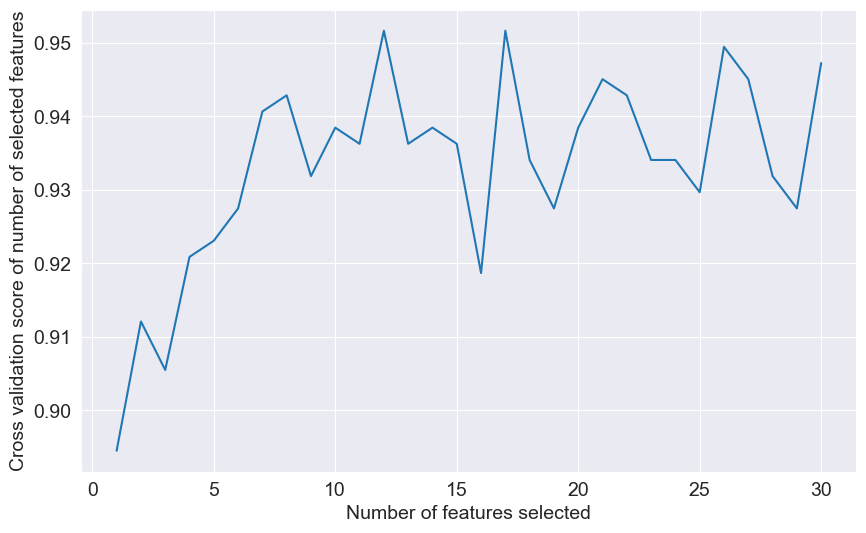

In [89]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [90]:
input_cols=['area_mean', 'smoothness_mean', 'concavity_mean', 'concave points_mean',
       'fractal_dimension_mean', 'perimeter_se', 'area_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst']

In [91]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [92]:
from itertools import product

In [93]:
def function(x,y):
    model = RandomForestClassifier(random_state=42,max_depth=y, n_jobs=-1, n_estimators=x)
    model.fit(train_inputs,train_targets)
    train_error=1-model.score(train_inputs,train_targets)
    test_error=1-model.score(test_inputs,test_targets)
    return {'n_estimators':x,'max_depth':y,'train_error':train_error,'test_error':test_error}

In [94]:
%%time
error_df=pd.DataFrame([function(x,y) for x,y in product(range(10,60),range(3,30))])

CPU times: total: 22.3 s
Wall time: 1min 30s


In [95]:
error_df[error_df['test_error']==error_df['test_error'].min()]

,n_estimators,max_depth,train_error,test_error
2,10,5,0.004396,0.026316


In [96]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10,n_estimators=10).fit(train_inputs,train_targets)
model.score(test_inputs,test_targets)

0.9473684210526315

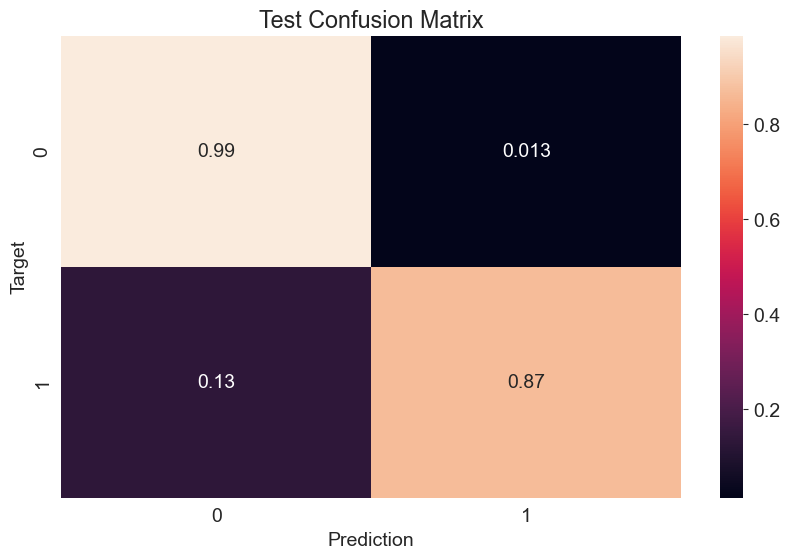

In [97]:
preds =model.predict(test_inputs)
cf = confusion_matrix(test_targets, preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix');

In [98]:
import joblib

In [99]:
Breast_Cancer ={
    'model':model,
    'input_cols':input_cols,
    'target_col':target_col
}

In [100]:
joblib.dump(Breast_Cancer,'Breast_Cancer_final.joblib')

['Breast_Cancer_final.joblib']

In [101]:
# pickle.dump(model,open('model.pkl','wb'))

In [122]:
train_inputs

,area_mean,smoothness_mean,concavity_mean,concave points_mean,fractal_dimension_mean,perimeter_se,area_se,concavity_se,concave points_se,symmetry_se,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst
44,531.5,0.09714,0.08259,0.05252,0.06177,1.334,14.49,0.01452,0.006853,0.01113,16.23,29.89,105.50,740.7,0.37280
150,519.4,0.11350,0.03136,0.02645,0.06087,2.873,34.78,0.01949,0.011530,0.02951,14.16,24.11,90.82,616.7,0.08112
18,1260.0,0.09831,0.14790,0.09498,0.05395,5.865,112.40,0.03391,0.015210,0.01356,27.32,30.88,186.80,2398.0,0.53720
245,337.7,0.10700,0.04831,0.03070,0.06440,2.517,23.22,0.01865,0.011330,0.03476,11.48,29.46,73.68,402.8,0.11810
86,648.2,0.09444,0.12040,0.04938,0.05636,3.301,38.87,0.05371,0.017610,0.02418,16.21,29.25,108.40,808.9,0.33490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,406.4,0.12360,0.04515,0.04531,0.07405,2.158,20.95,0.01865,0.017660,0.01560,12.98,32.19,86.12,487.7,0.13950
472,686.9,0.08098,0.05539,0.03221,0.05669,1.826,23.31,0.02310,0.008399,0.01148,17.18,18.22,112.00,906.6,0.31510
128,674.5,0.11500,0.11380,0.08534,0.06467,2.796,39.84,0.03204,0.022580,0.02353,16.11,18.33,105.90,762.6,0.19600
205,716.6,0.08876,0.07550,0.04079,0.05986,1.974,26.44,0.02039,0.008260,0.01523,17.77,20.24,117.70,989.5,0.33270


In [123]:
train_targets

44     M
150    B
18     M
245    B
86     M
      ..
537    B
472    B
128    B
205    M
223    M
Name: diagnosis, Length: 455, dtype: object

In [124]:
model=joblib.load('Breast_Cancer_final.joblib')

In [126]:
model['model'].predict([[531.5,0.09714,0.08259,0.05252,0.06177,1.334,14.49,0.01452,0.006853,0.01113,16.23,29.89,105.50,740.7,0.37280]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)

In [129]:
model['model'].predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)